# Exploratroy Data Analysis

## Overview
In this notebook, we will perform exploratory data analysis (EDA) on the `probabilities.csv` dataset. The goal is to understand the dataset's structure, identify potential data quality issues, and uncover meaningful patterns or relationships between features. 

### Steps:
1. **Data Loading:** Load the dataset into a pandas DataFrame.
2. **Data Exploration:** Examine the dataset's characteristics, including data types, minimum and maximum of the numerical features.
3. **Data Visualization:** Use visualizations such as histograms, box plots, and heatmaps to analyze distributions, identify outliers, and explore correlations between features.
4. **Data Analysis:** Perform detailed analysis, including descriptive statistics, outlier handling, and correlation analysis, with a focus on probability columns.
5. **Summary and Insights:** Summarize key findings and provide actionable insights or next steps for further analysis or modeling.

## Data loading
Here we are loading the dataset `probabilities.csv` into a pandas DataFrame.

In [1]:
import pandas as pd

df = pd.read_csv('../data/probabilities.csv')
print(f'df: {df.shape[0]} rows and {df.shape[1]} columns')
display(df.head())

df: 12360 rows and 119 columns


,year,gisjoin,state,county,P(C),P(households_income_under_10k|C),P(households_income_10k_15k|C),P(households_income_15k_25k|C),P(households_income_25k_plus|C),P(persons_male|C),...,P(labor_force_civilian|C),P(labor_force_employed|C),P(labor_force_unemployed|C),P(not_in_labor_force|C),P(persons_hispanic|C),P(persons_below_poverty|C),P(democrat|C),P(other|C),P(republican|C),P(non_voter|C)
0,2008,G0100010,Alabama,Autauga County,0.000177,0.066741,0.050512,0.087433,0.795314,0.484997,...,0.469739,0.457925,0.030308,0.257643,0.023196,0.105785,0.114627,0.002728,0.327401,0.555244
1,2008,G0100030,Alabama,Baldwin County,0.000586,0.059675,0.048261,0.118775,0.773289,0.488660,...,0.456428,0.446667,0.031361,0.315852,0.038955,0.120689,0.110279,0.004301,0.348545,0.536876
2,2008,G0100050,Alabama,Barbour County,0.000092,0.173047,0.098418,0.139867,0.588668,0.528972,...,0.377342,0.357739,0.037944,0.405321,0.045958,0.223943,0.205675,0.002419,0.211777,0.580129
3,2008,G0100070,Alabama,Bibb County,0.000075,0.073512,0.073512,0.151458,0.701519,0.537904,...,0.461831,0.434277,0.043653,0.316541,0.005927,0.125166,0.101681,0.003671,0.276957,0.617691
4,2008,G0100090,Alabama,Blount County,0.000189,0.084543,0.060180,0.130114,0.725164,0.495308,...,0.451986,0.435793,0.035472,0.310802,0.074896,0.132470,0.062125,0.006280,0.359645,0.571950


In [2]:
print(df.columns.tolist())

['year', 'gisjoin', 'state', 'county', 'P(C)', 'P(households_income_under_10k|C)', 'P(households_income_10k_15k|C)', 'P(households_income_15k_25k|C)', 'P(households_income_25k_plus|C)', 'P(persons_male|C)', 'P(persons_female|C)', 'P(male_never_married|C)', 'P(male_married|C)', 'P(male_separated|C)', 'P(male_widowed|C)', 'P(male_divorced|C)', 'P(female_never_married|C)', 'P(female_married|C)', 'P(female_separated|C)', 'P(female_widowed|C)', 'P(female_divorced|C)', 'P(male_18_24_less_than_9th|C)', 'P(male_18_24_some_hs|C)', 'P(male_18_24_hs_grad|C)', 'P(male_18_24_some_college|C)', 'P(male_18_24_associates|C)', 'P(male_18_24_bachelors|C)', 'P(male_18_24_graduate|C)', 'P(male_25_34_less_than_9th|C)', 'P(male_25_34_some_hs|C)', 'P(male_25_34_hs_grad|C)', 'P(male_25_34_some_college|C)', 'P(male_25_34_associates|C)', 'P(male_25_34_bachelors|C)', 'P(male_25_34_graduate|C)', 'P(male_35_44_less_than_9th|C)', 'P(male_35_44_some_hs|C)', 'P(male_35_44_hs_grad|C)', 'P(male_35_44_some_college|C)', '

As we can see the dataset contains 12360 rows and 119 columns. From printing the first 10 lines we can see that the dataset is a mix of numerical and categorical data. The columns with numerical valoues represent probabilities of various demographic and socioeconomic characteristics conditioned on certain factors (e.g., `P(democrat|C)` represents the probability of voting Democrat given a certain county).

## Data exploration
As mentioned before the dataset contains 12360 rows and 119 columns, with a mix of numerical and categorical data. The numerical columns include probabilities of which now we will be calculating some descriptive statistics such as mean, median, mode, and standard deviation for the numerical columns to summarize their distributions.

In [5]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate means, medians, modes, and standard deviations for numerical variables
numerical_stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Mode': df[numerical_cols].mode().iloc[0],
    'Standard Deviation': df[numerical_cols].std()
})
# Transpose the DataFrame for better readability
numerical_stats_transposed = numerical_stats.T
display(numerical_stats_transposed)


,year,P(C),P(households_income_under_10k|C),P(households_income_10k_15k|C),P(households_income_15k_25k|C),P(households_income_25k_plus|C),P(persons_male|C),P(persons_female|C),P(male_never_married|C),P(male_married|C),...,P(labor_force_civilian|C),P(labor_force_employed|C),P(labor_force_unemployed|C),P(not_in_labor_force|C),P(persons_hispanic|C),P(persons_below_poverty|C),P(democrat|C),P(other|C),P(republican|C),P(non_voter|C)
Mean,2014.000000,0.000324,0.074474,0.061499,0.116410,0.747617,0.500842,0.499158,0.125794,0.221301,...,0.464357,0.439770,0.030670,0.327072,0.089067,0.150175,0.165146,0.012064,0.277635,0.545155
Median,2014.000000,0.000083,0.067223,0.058963,0.116351,0.754353,0.496649,0.503351,0.119257,0.222911,...,0.468225,0.444071,0.028781,0.319279,0.038122,0.141994,0.151652,0.008817,0.274800,0.544493
Mode,2008.000000,0.000017,0.000000,0.000000,0.142857,0.625000,0.500000,0.500000,0.097222,0.250000,...,0.500000,0.500000,0.000000,0.250000,0.000000,0.125000,0.059829,0.000000,0.292703,0.500000
Standard Deviation,4.472317,0.001034,0.036769,0.025571,0.036562,0.086850,0.023237,0.023237,0.033667,0.028243,...,0.057969,0.062277,0.014289,0.068998,0.135052,0.060401,0.079625,0.010955,0.085371,0.082385


### Descriptive Statistics
Based on the descriptive statistics that were applied to the data set here are a few that stood out from the rest.

1. **`P(democrat|C)` Mean and Standard Deviation**:
    - **Mean**: 0.165
    - **Standard Deviation**: 0.079
    The mean probability of voting Democrat is relatively low, indicating that the dataset may be skewed towards other voting behaviors (e.g., Republican or non-voter). The standard deviation suggests moderate variability, highlighting differences in voting patterns across counties.

2. **`P(non_voter|C)` Mean and Median**:
    - **Mean**: 0.545
    - **Median**: 0.544
    The high mean and median values for non-voters suggest that a significant portion of the population in the dataset does not participate in voting. This could have implications for understanding voter turnout and its impact on election outcomes.

3. **`P(households_income_under_10k|C)` Mean and Standard Deviation**:
    - **Mean**: 0.074
    - **Standard Deviation**: 0.037
    The relatively low mean indicates that only a small proportion of households fall under this income bracket. However, the standard deviation suggests notable variability, which could be linked to socioeconomic disparities across counties.

4. **`P(persons_below_poverty|C)` Mean and Standard Deviation**:
    - **Mean**: 0.150
    - **Standard Deviation**: 0.060
    The mean indicates that 15% of the population is below the poverty line, which is a significant proportion. The variability across counties could provide insights into regional economic inequalities.

5. **`P(male_white|C)` and `P(female_white|C)` Mean**:
    - **Mean (Male)**: 0.413
    - **Mean (Female)**: 0.414
     The nearly equal proportions of male and female white populations suggest gender balance within this demographic. This could be useful for demographic-specific analyses.

6. **`P(labor_force_employed|C)` Mean and Standard Deviation**:
    - **Mean**: 0.440
    - **Standard Deviation**: 0.062
    The mean indicates that less than half of the population is employed, which could reflect economic challenges or a high proportion of non-working age individuals. The variability suggests differences in employment rates across counties.

These statistics provide valuable insights into the dataset's demographic, socioeconomic, and voting behavior patterns, which can guide further analysis and modeling efforts.

## Data visualization
In this section, we will focus on visualizing the dataset to better understand its structure and relationships between features. Specifically, we will plot histograms for the probability columns to analyze their distributions and identify any skewness or unusual patterns. Use box plots to detect outliers in the probability columns. Create heatmaps to visualize correlations between numerical features, particularly focusing on the probability columns. This will help us identify strong relationships or redundancies among features.

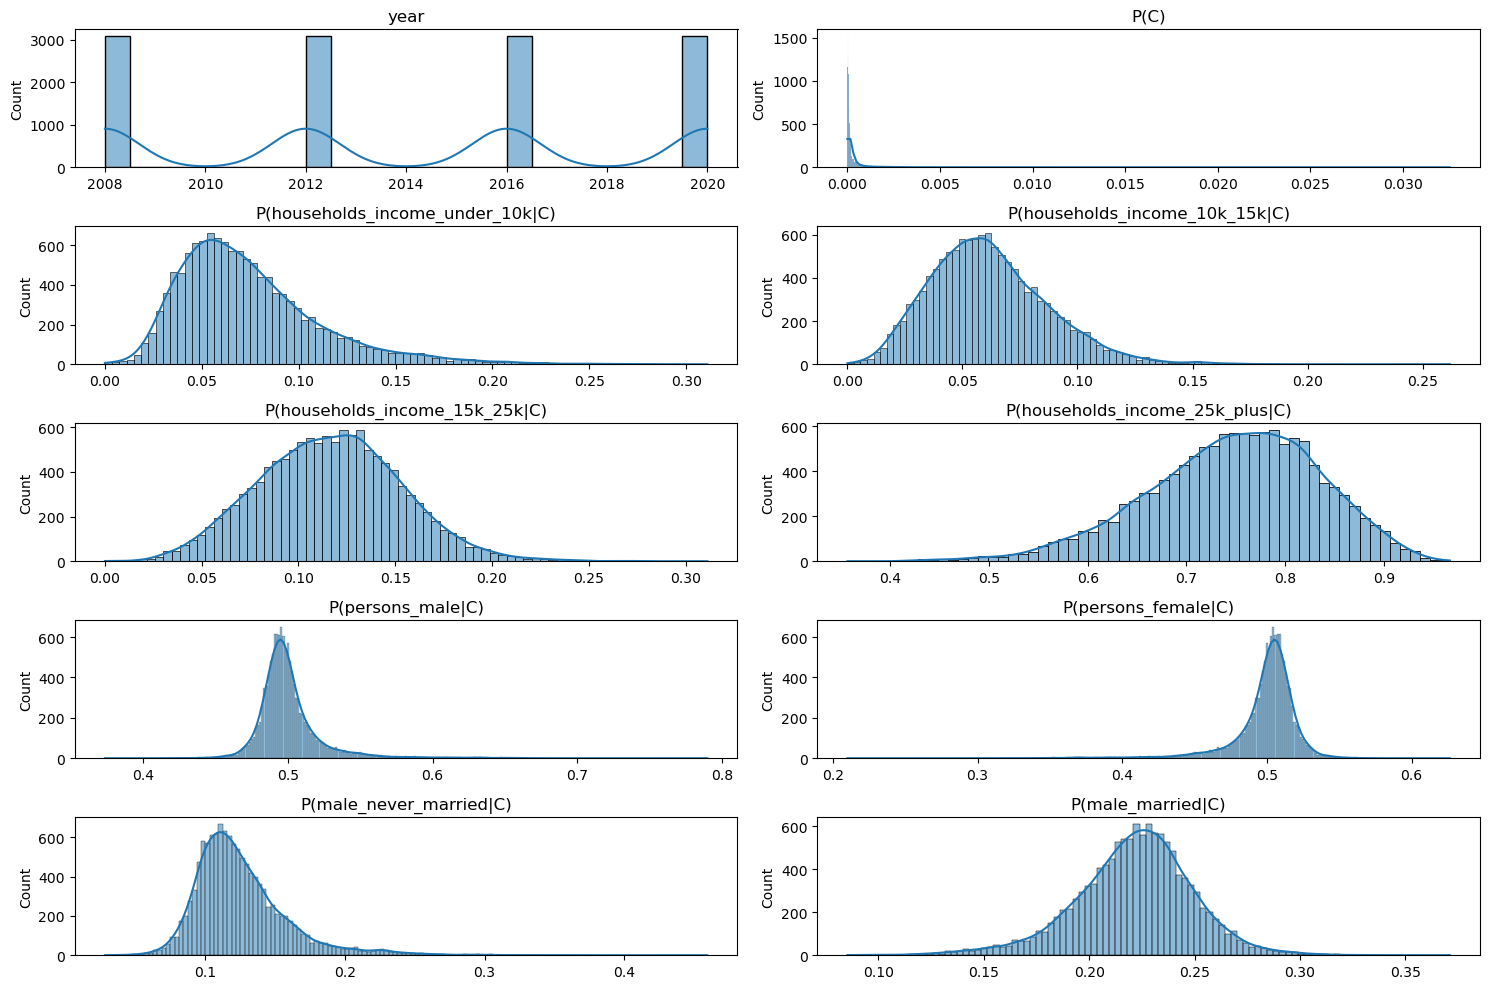

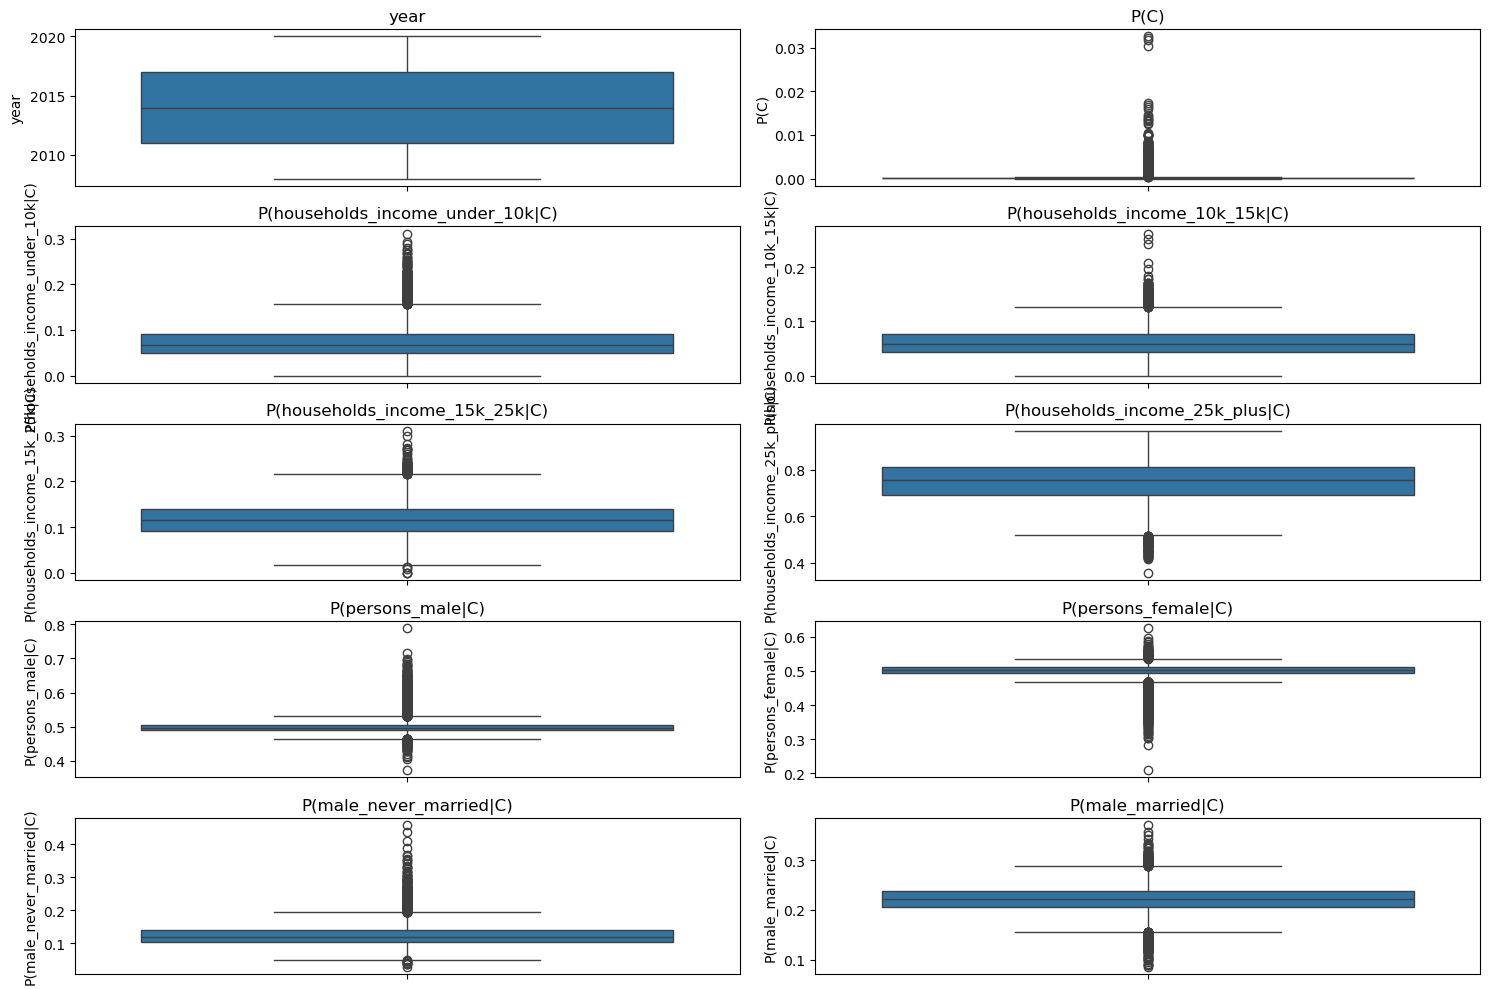

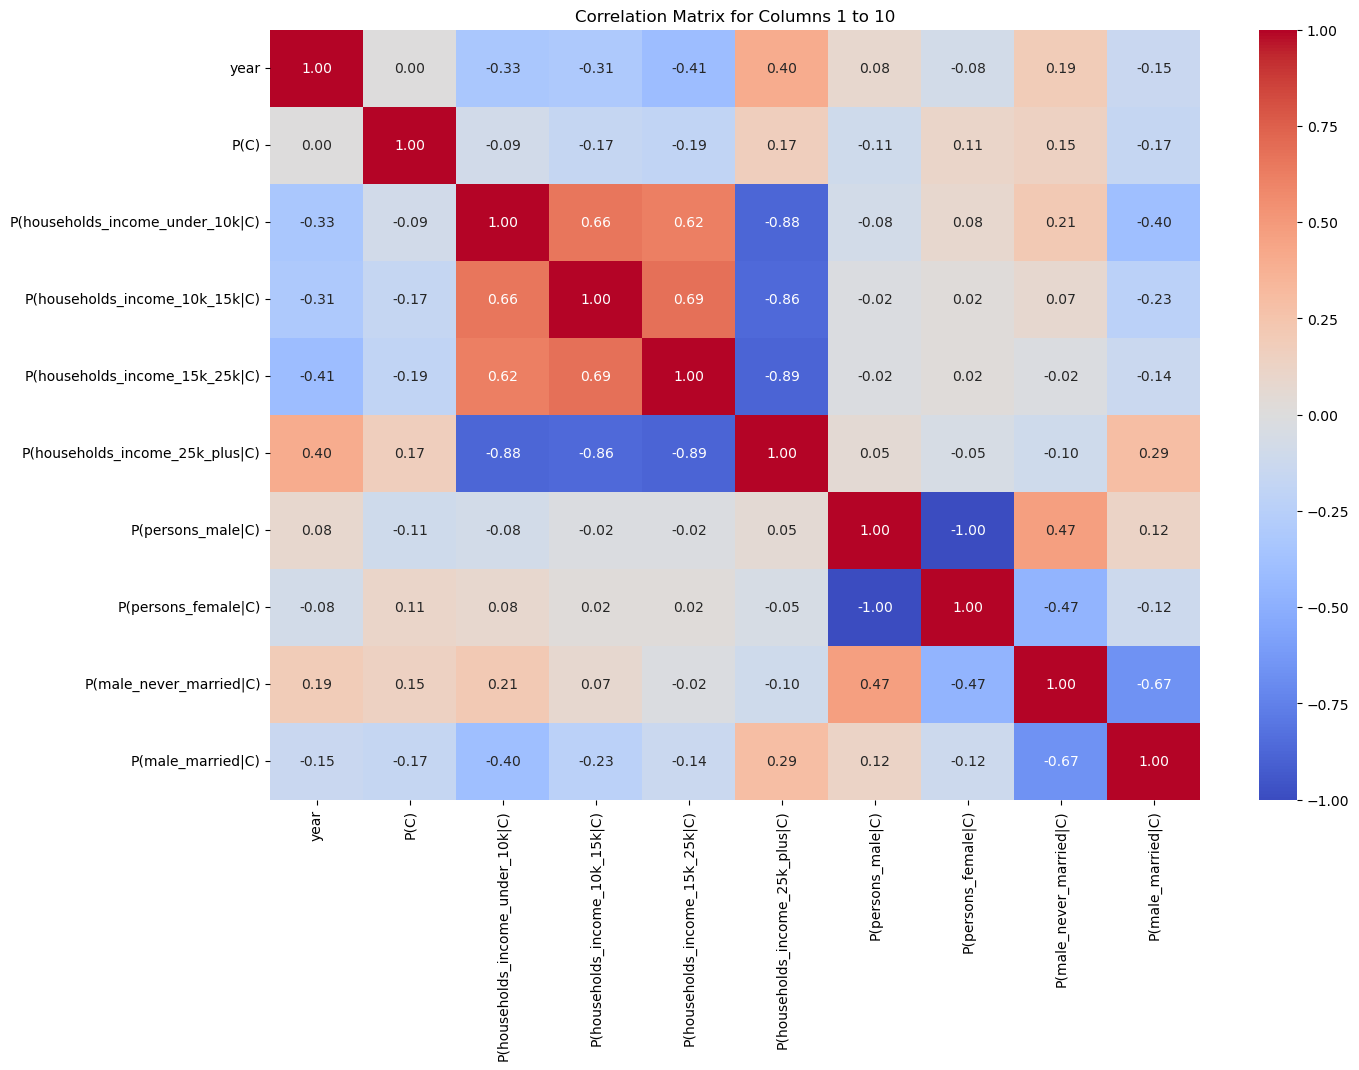

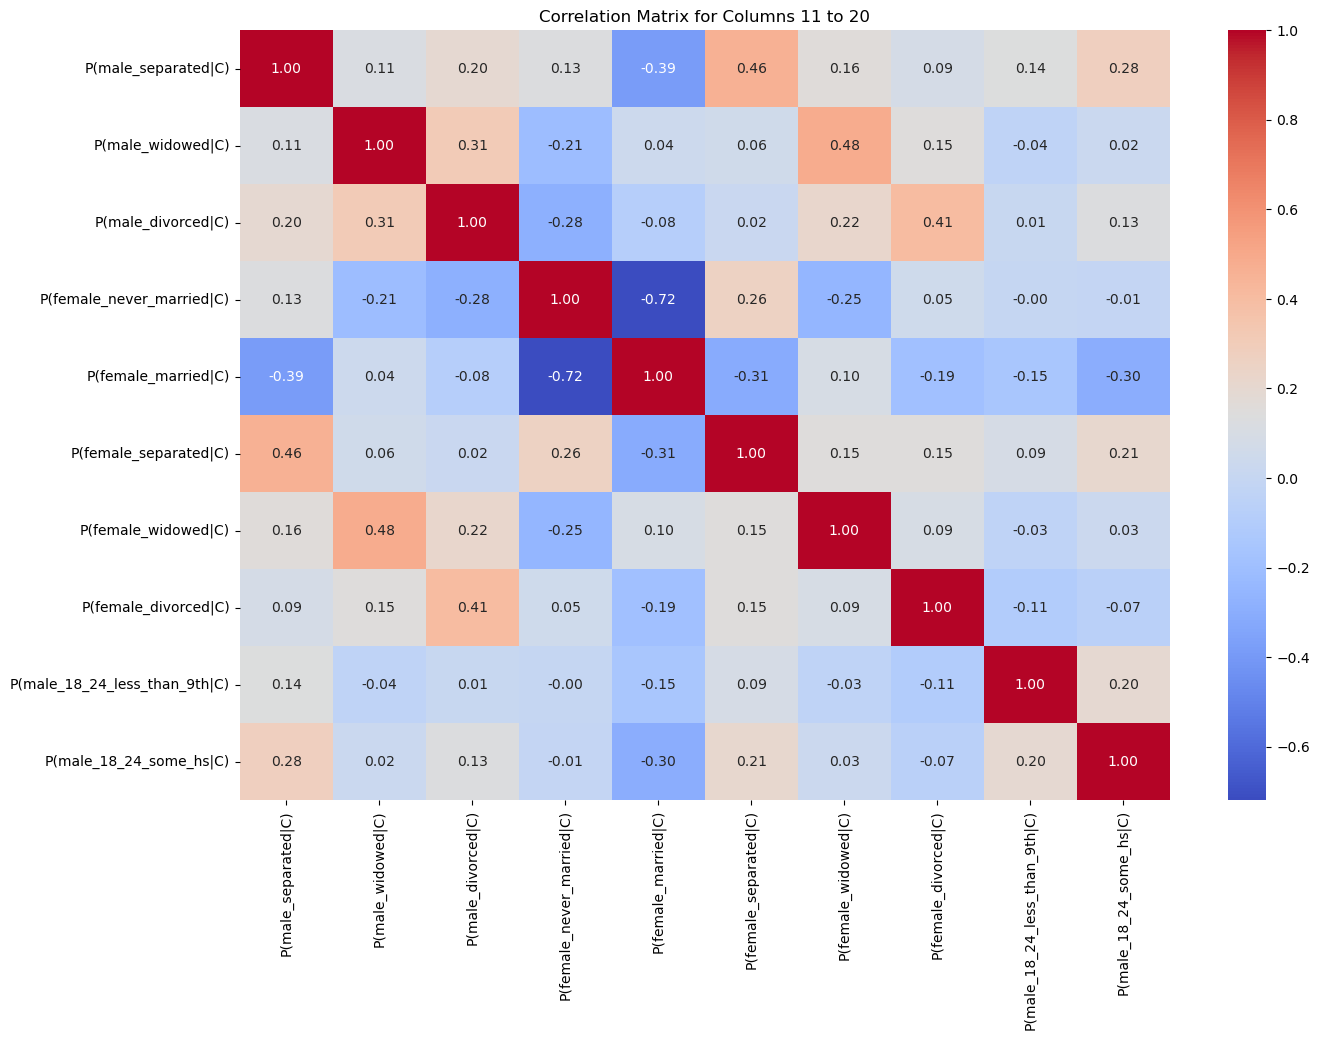

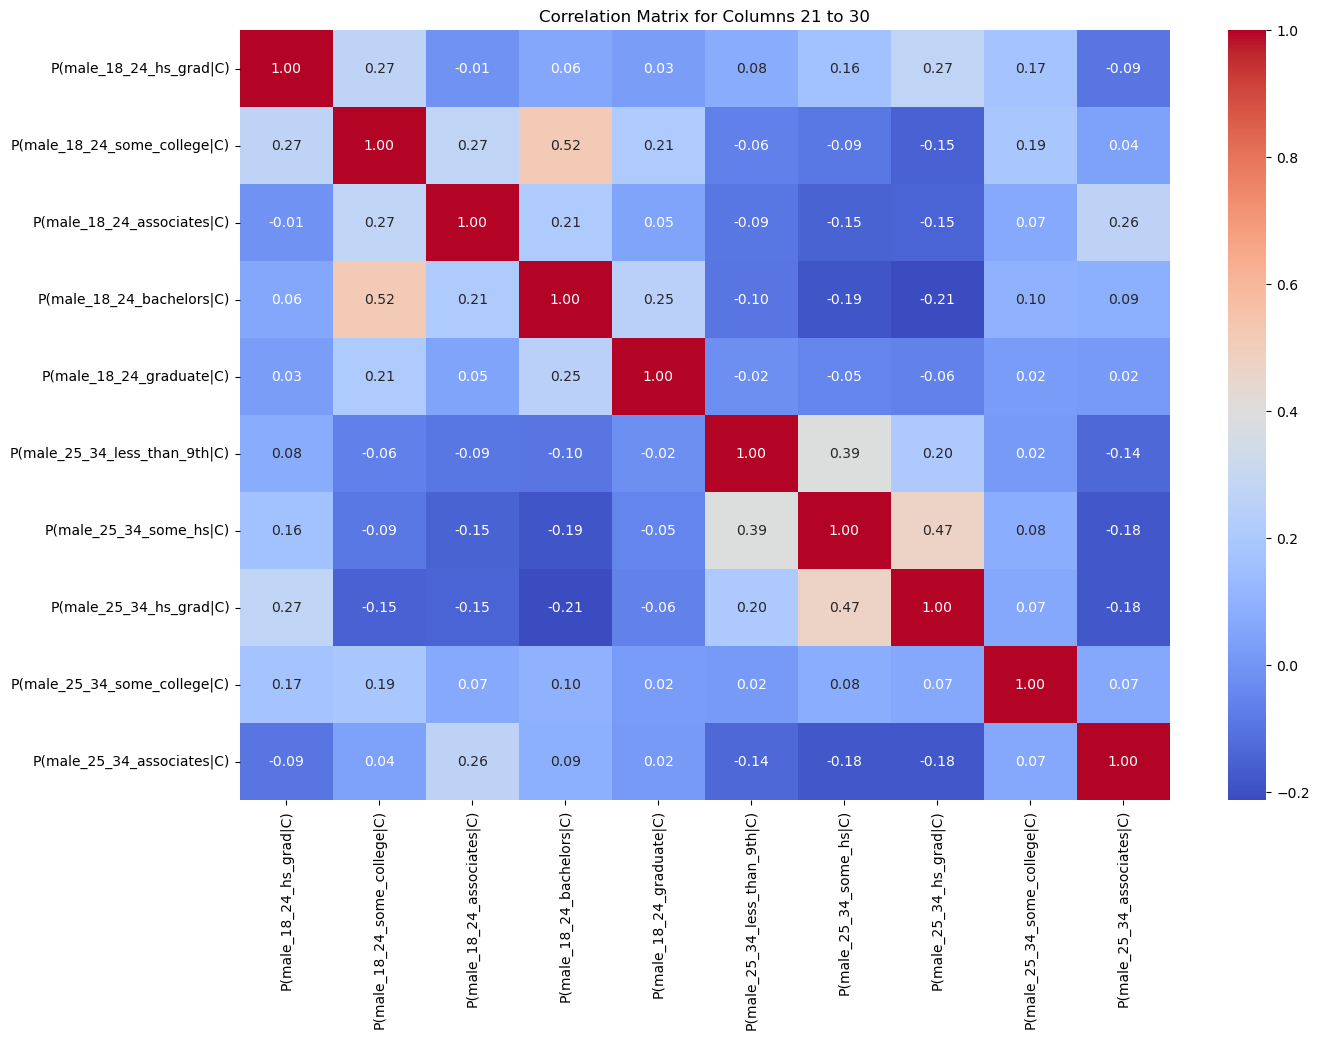

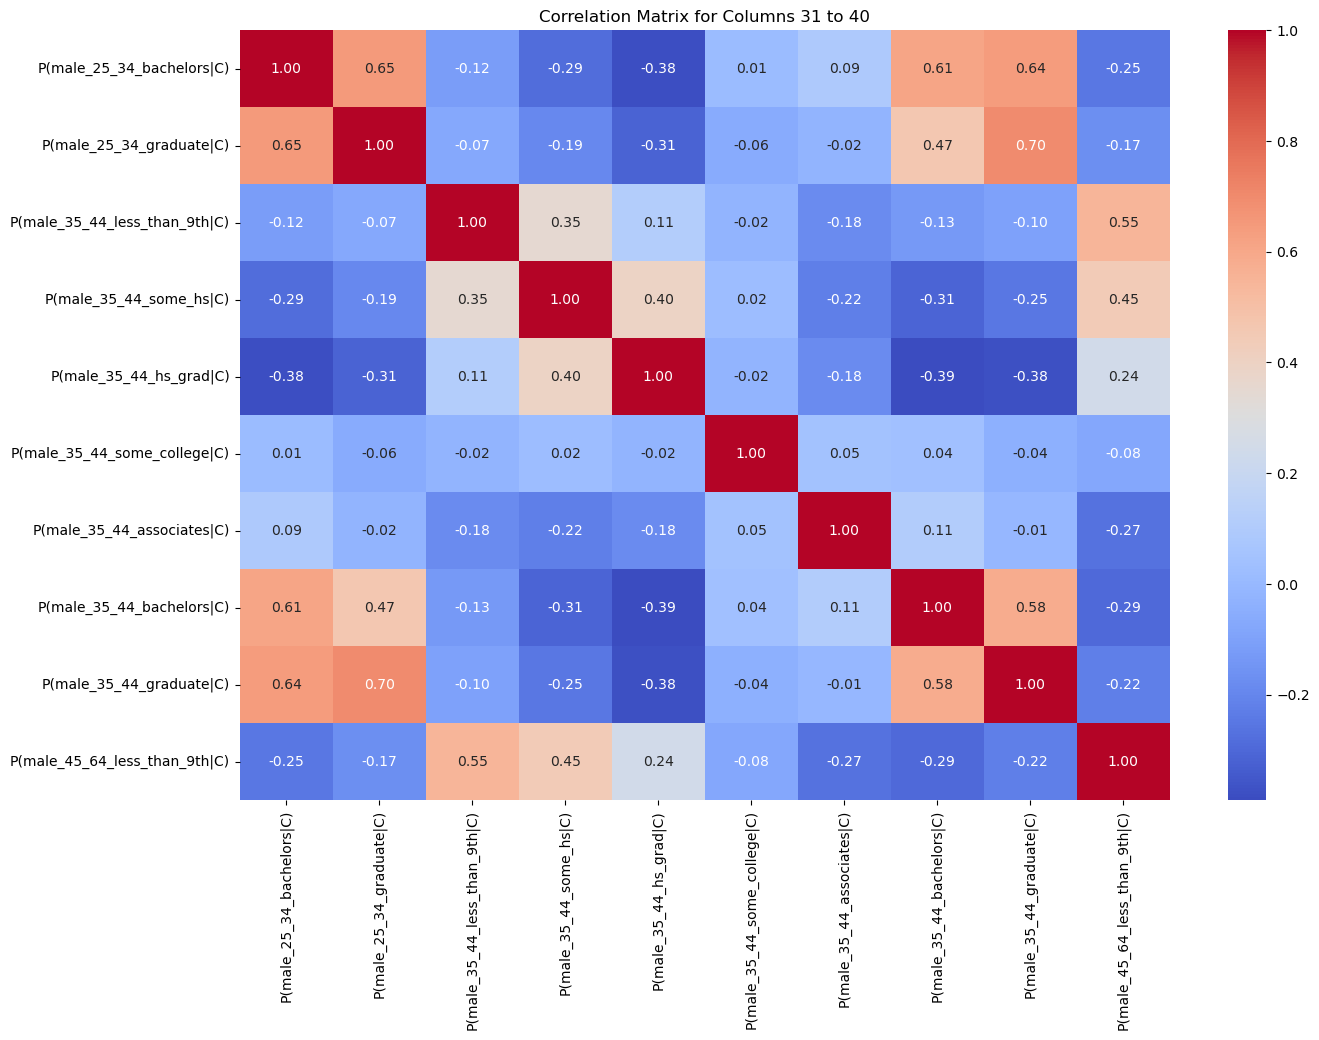

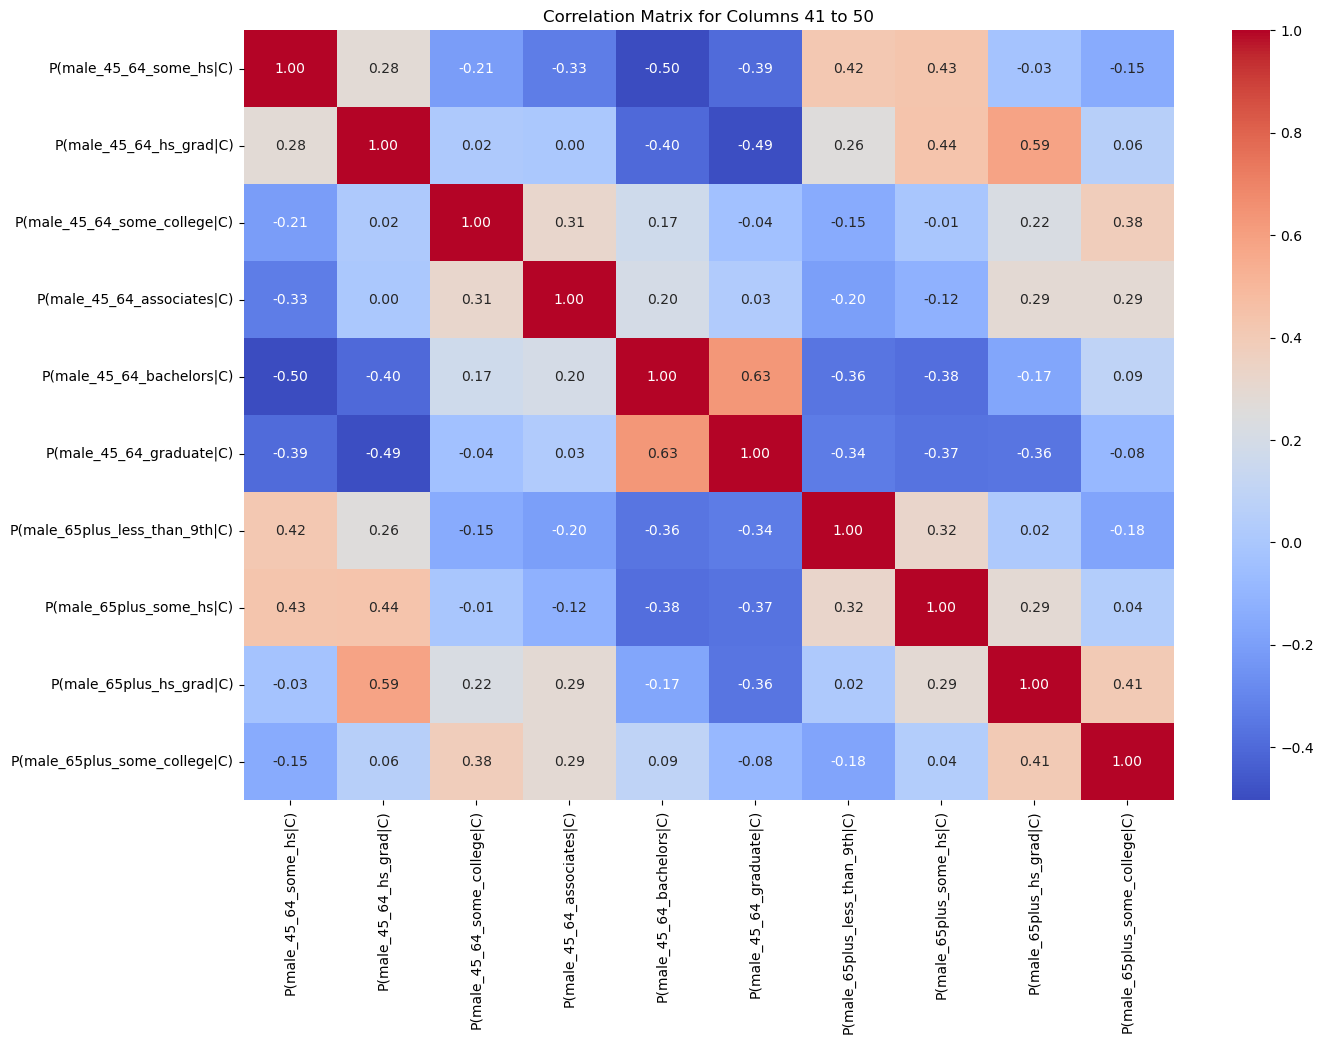

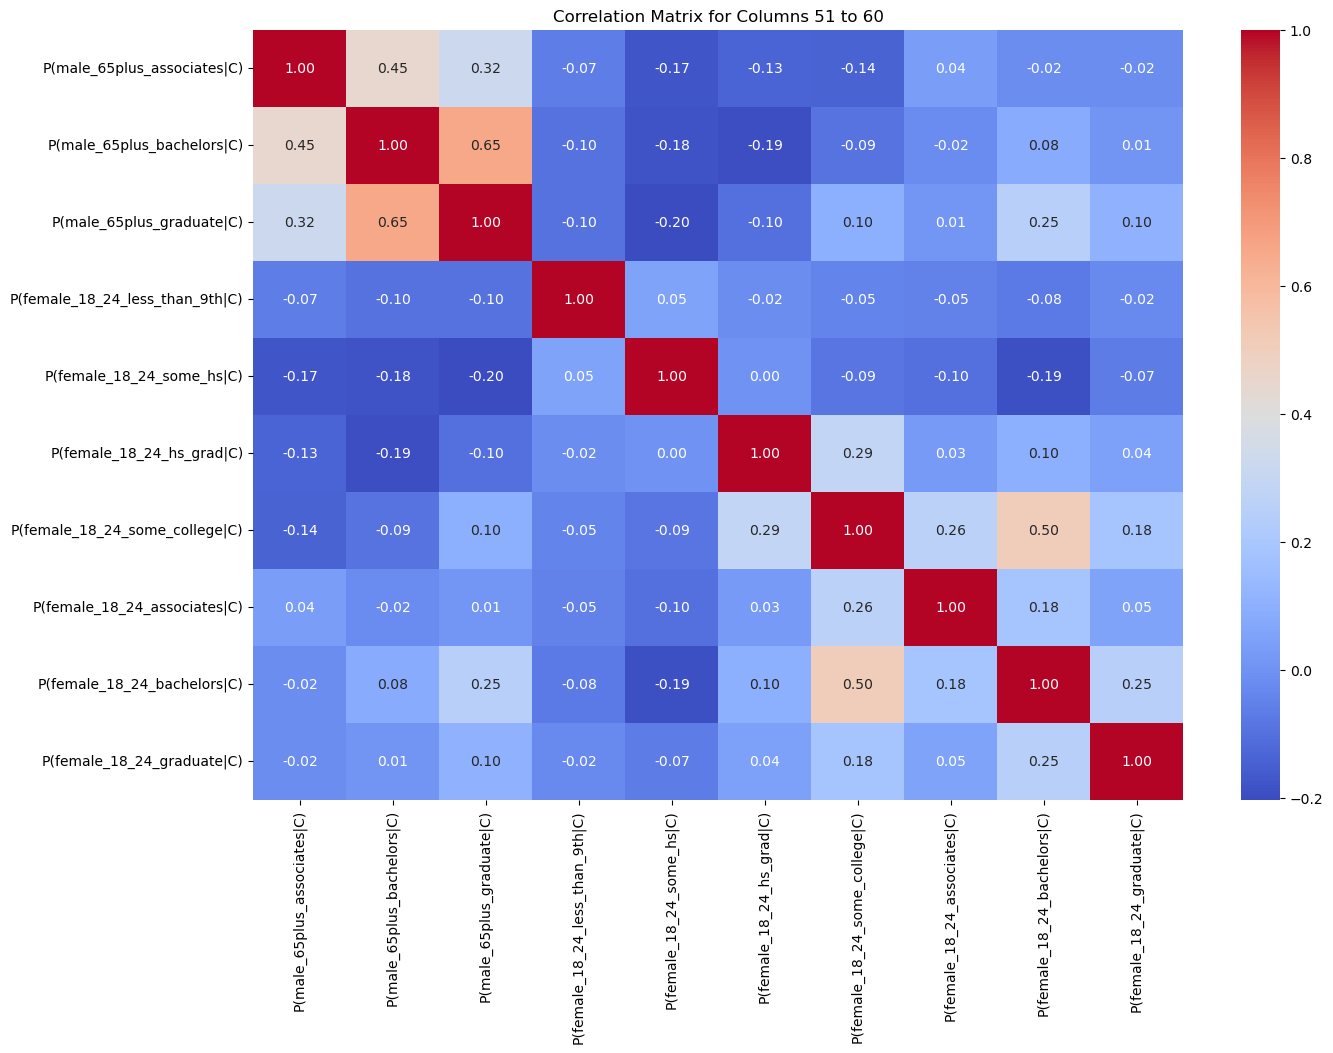

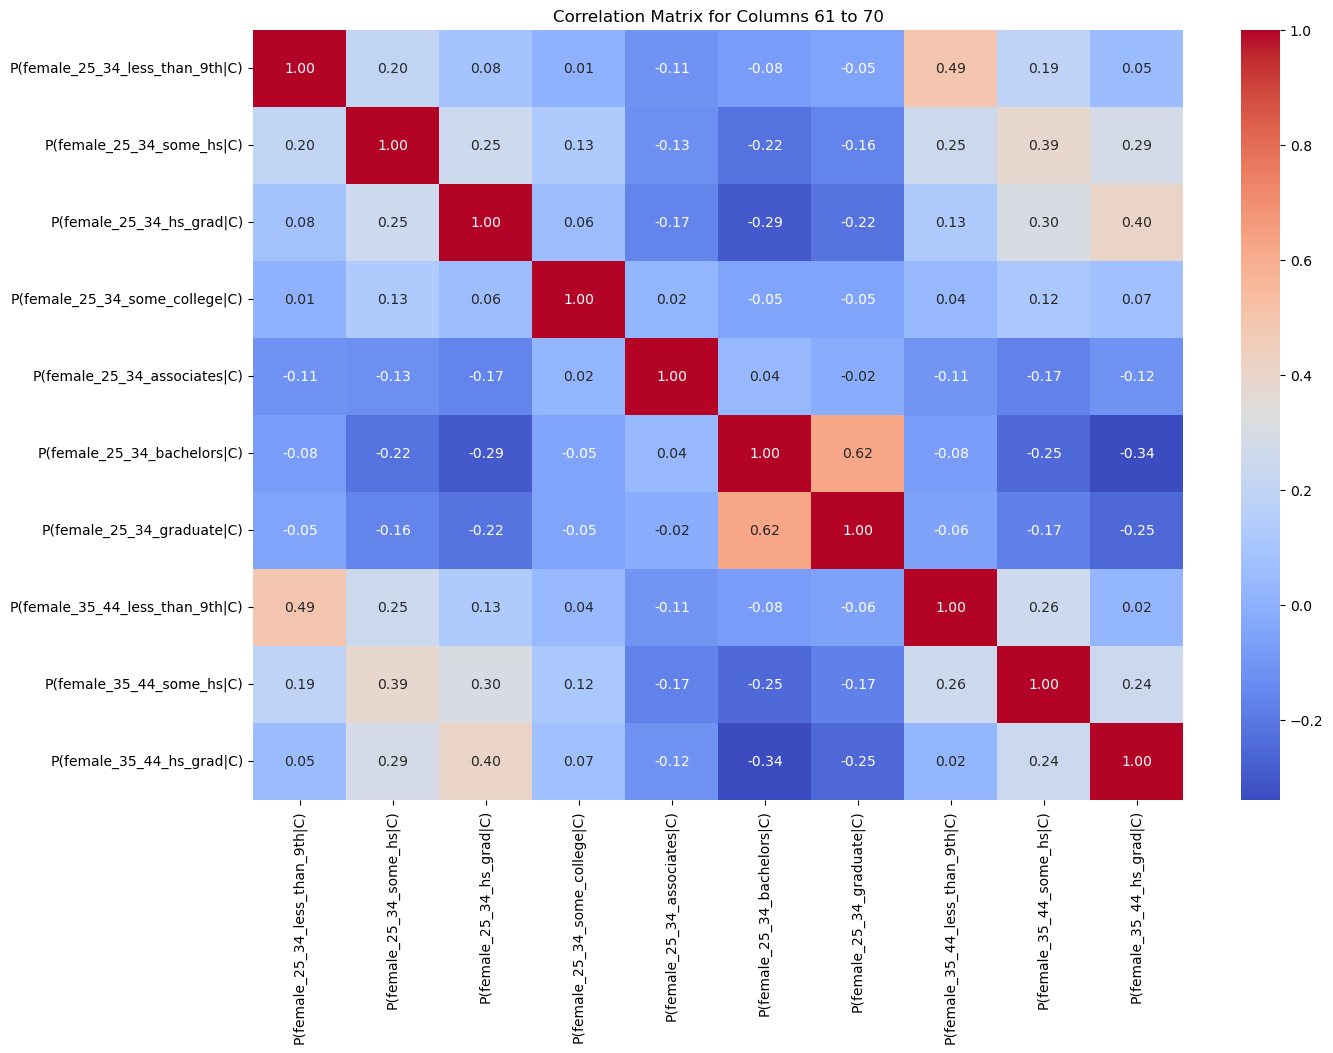

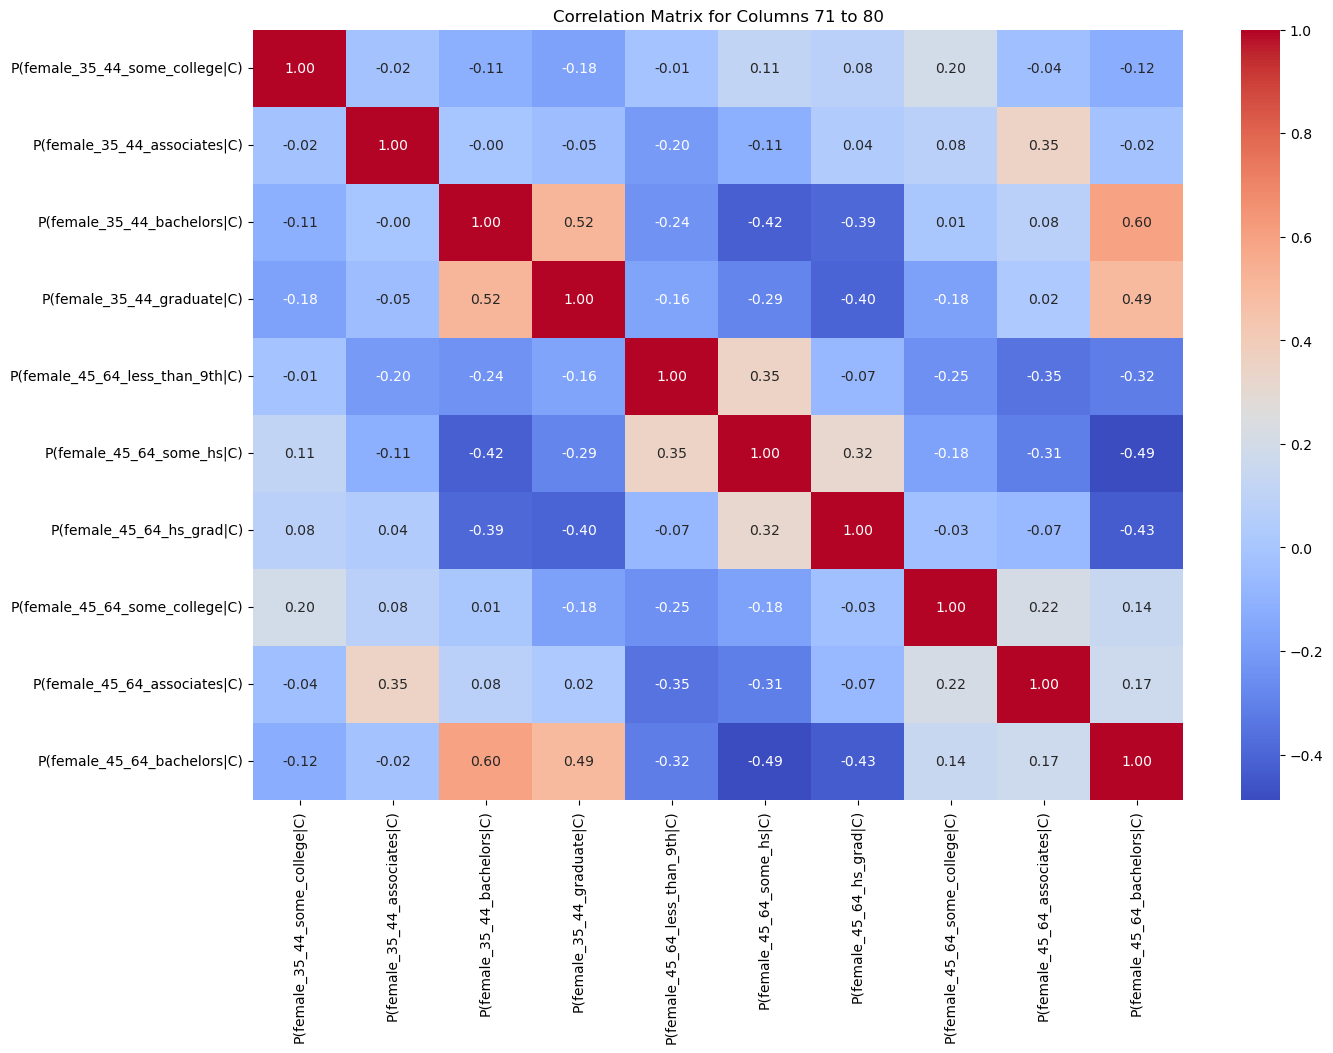

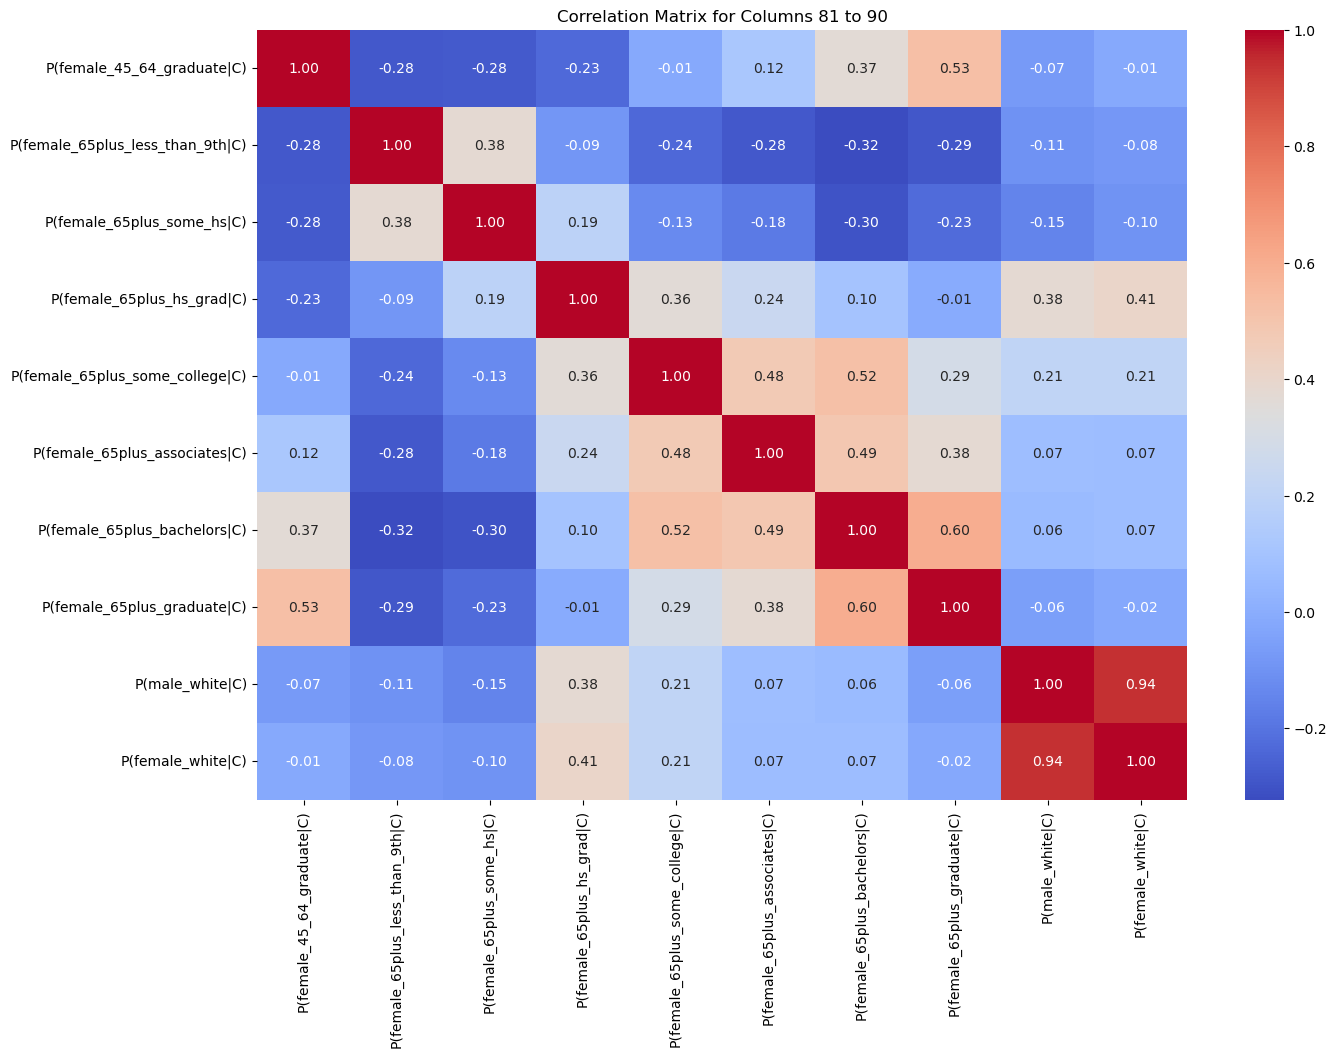

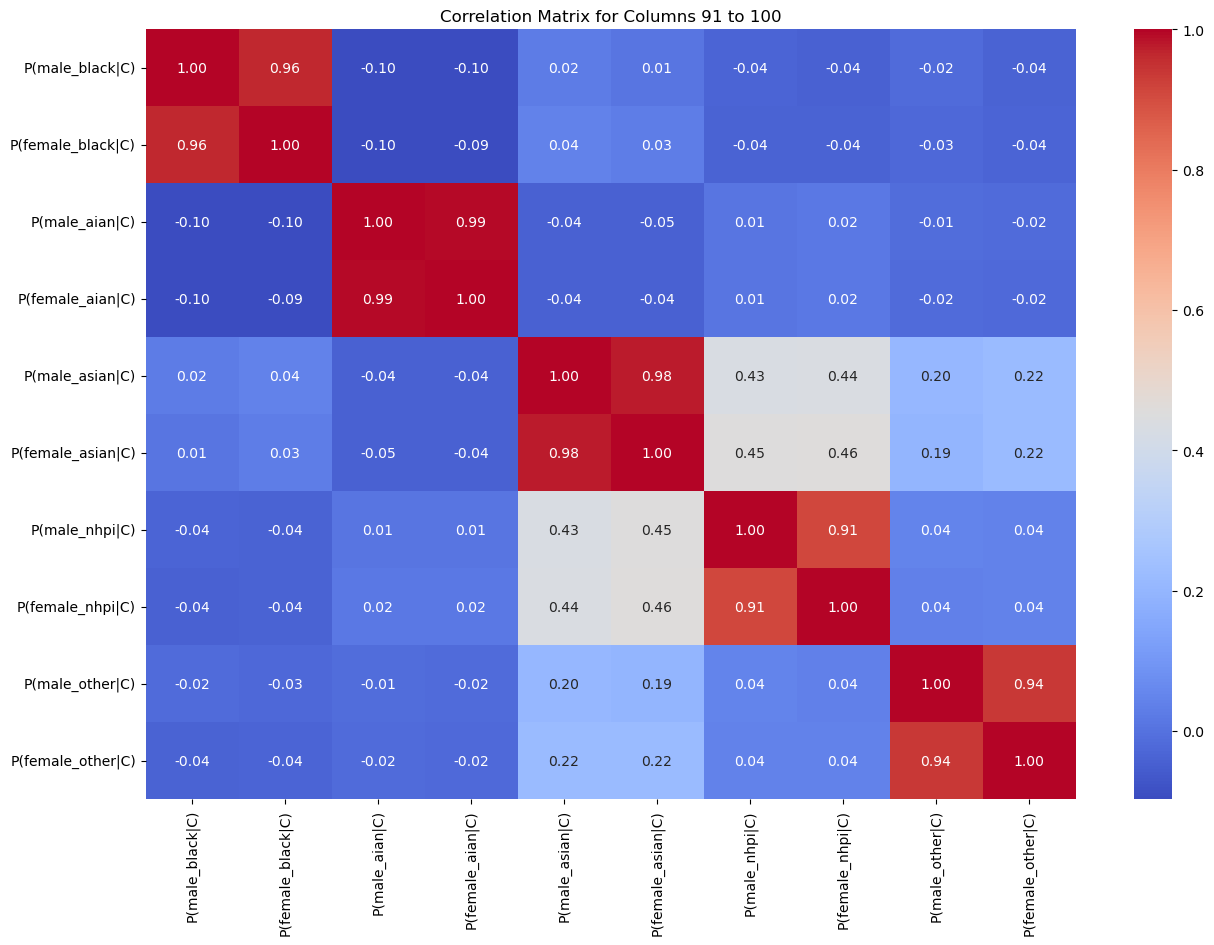

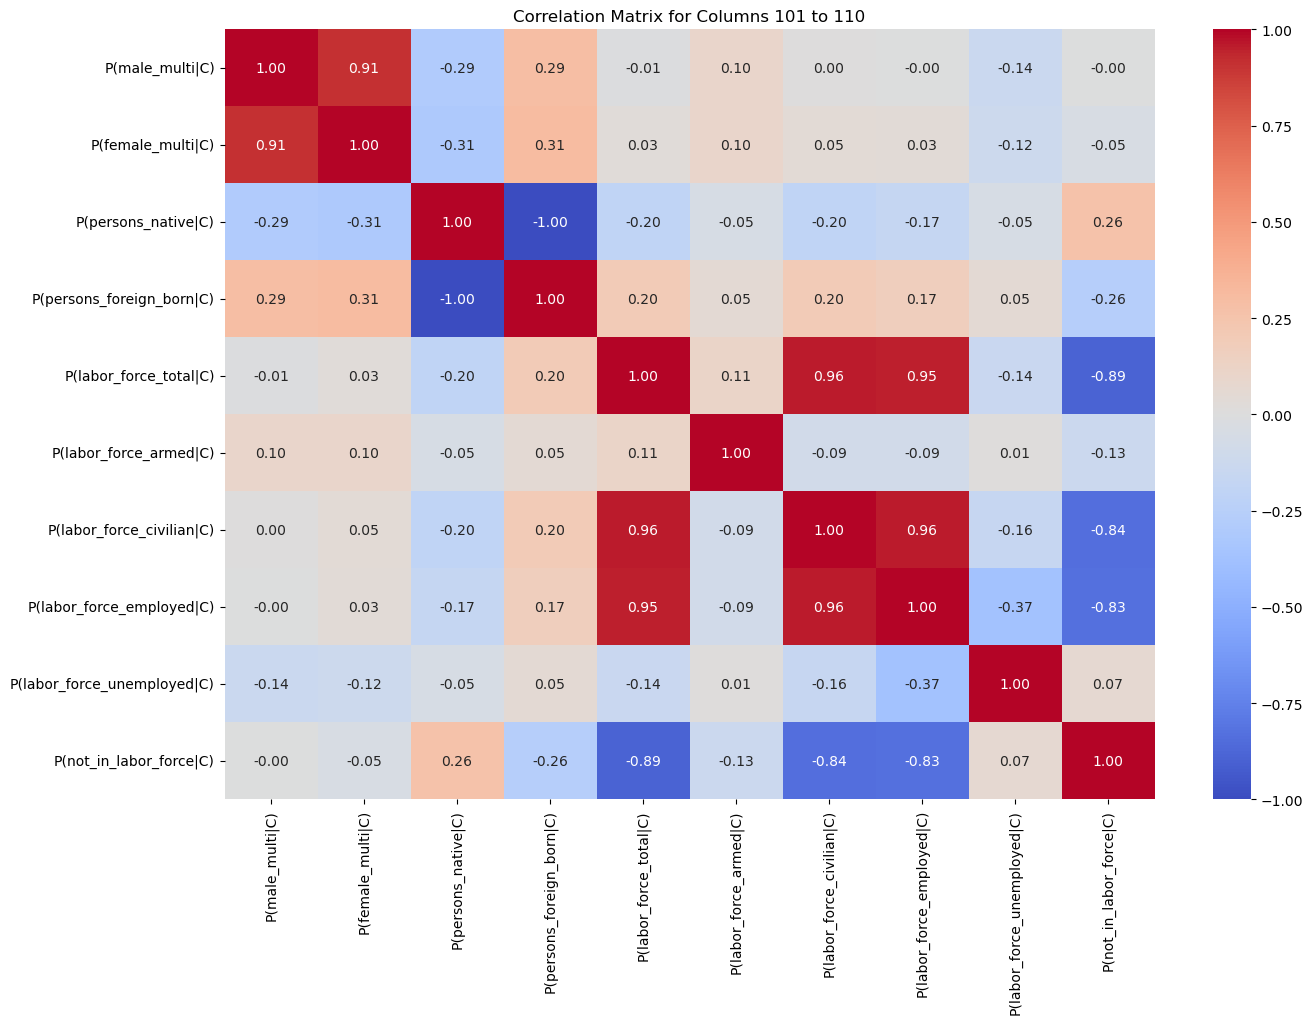

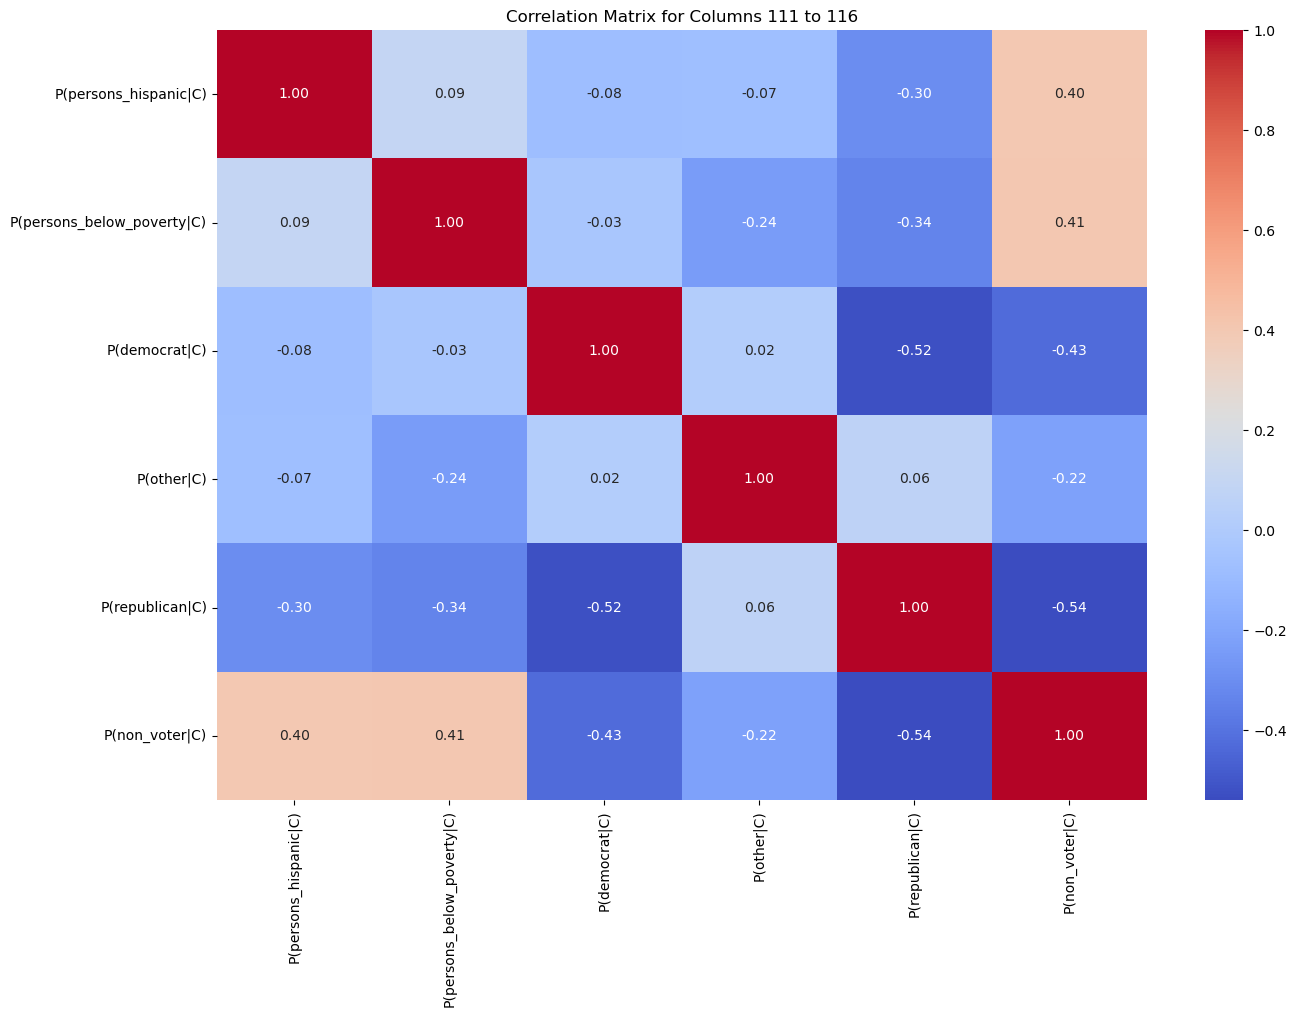

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=['number']).columns

# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:10]):  # Limit to the first 10 numerical columns
    plt.subplot(5, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()


# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:10]):  # Limit to the first 10 numerical columns
    plt.subplot(5, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Break the heatmap into smaller heatmaps for better readability
num_features = len(numerical_cols)
chunk_size = 10  # Number of features per smaller heatmap

for i in range(0, num_features, chunk_size):
    plt.figure(figsize=(15, 10))
    chunk = numerical_cols[i:i + chunk_size]
    correlation_chunk = df[chunk].corr()
    sns.heatmap(correlation_chunk, annot=True, fmt=".2f", cmap='coolwarm')  # Added `annot=True` and `fmt=".2f"` for labels
    plt.title(f'Correlation Matrix for Columns {i + 1} to {min(i + chunk_size, num_features)}')
    plt.show()

### Graph Analysis and Observations

#### Histograms
From the histograms we are able to see key observations. The first being **Skewed Distributions**, many columns, such as `P(democrat|C)` and `P(non_voter|C)`, exhibit skewed distributions. Talking a closer look at `P(non_voter|C)`, it is heavily concentrated around 0.5, indicating that a significant portion of the population does not vote. Second, some columns can also be considered **outliers**, such as `P(households_income_under_10k|C)`, show long tails, suggesting the presence of outliers or extreme values. Lastly, a few columns, such as `P(persons_male|C)` and `P(persons_female|C)`, exhibit bimodal distributions, which may indicate distinct subgroups within the data.

#### Box Plots
The box plots highlight the presence of outliers and the spread of the data. Looking at columns like `P(households_income_under_10k|C)` and `P(persons_below_poverty|C)` have numerous **outliers**, which could represent counties with extreme socioeconomic conditions. Then in Columns such as `P(male_white|C)` and `P(female_white|C)` have narrow interquartile ranges, indicating low variability across counties.

#### Heatmaps
The heatmap visualizes correlations between the numerical columns. Features like `P(male_white|C)` and `P(female_white|C)` are highly correlated, suggesting demographic consistency across genders within the same racial group. On the other end columns such as `P(democrat|C)` and `P(republican|C)` exhibit low correlation, reflecting the expected political dichotomy. Lastly in some heatmaps we can see clusters of features with high correlations, such as those related to income levels and education, which may indicate underlying socioeconomic patterns.

### Interesting Cases
- **`P(democrat|C)` and `P(non_voter|C)` Relationship:**
    - The skewness in `P(non_voter|C)` and its potential correlation with `P(democrat|C)` could provide insights into voter turnout and its impact on election outcomes.

- **Outliers in Poverty and Income Columns:**
    - The outliers in `P(households_income_under_10k|C)` and `P(persons_below_poverty|C)` suggest counties with extreme poverty levels, which may warrant further investigation into regional disparities.

- **Gender Balance in Demographics:**
    - The nearly equal distributions of `P(persons_male|C)` and `P(persons_female|C)` highlight gender balance across counties, which could be useful for demographic-specific analyses.

- **Education and Income Correlations:**
    - The strong correlations between education levels (e.g., `P(male_25_34_bachelors|C)`) and income brackets suggest that higher education is associated with higher income levels, consistent with socioeconomic theories.

# Summary:
In the Exploratory Data Analysis (EDA), the dataset `probabilities.csv` was analyzed to understand its structure, identify data quality issues, and explore relationships between features. Key steps included:

1. **Data Loading and Exploration:**
    - The dataset contains 12360 rows and 119 columns, with a mix of numerical and categorical data.
    - Numerical columns represent probabilities of various demographic and socioeconomic characteristics.

2. **Descriptive Statistics:**
    - Calculated mean, median, mode, and standard deviation for numerical columns.
    - Identified key insights, such as the mean probability of voting Democrat (`P(democrat|C)`) being 0.165 and the high mean of non-voters (`P(non_voter|C)`) at 0.545.

3. **Data Visualization:**
    - Histograms revealed skewed distributions and outliers in columns like `P(households_income_under_10k|C)`.
    - Box plots highlighted outliers and variability in features.
    - Heatmaps visualized correlations, showing strong relationships between features like `P(male_white|C)` and `P(female_white|C)`.

4. **Key Findings:**
    - Probability value errors were identified and clipped to the valid range [0,1].
    - Correlation analysis highlighted features strongly related to `P(democrat|C)`.
    - Smaller heatmaps improved readability of the top 30 correlated features.

5. **Insights and Next Steps:**
    - Investigate data quality issues, particularly out-of-range probability values.
    - Use correlation analysis to guide feature engineering or selection for modeling.